# Unsupervised Learning: Clustering Lab





In [1]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from scipy.io import arff
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
def readData(filename):
  data = arff.loadarff(filename)
  datapd = pd.DataFrame(data[0])
  datanp = datapd.to_numpy()
  return datanp

## 1. Initial practice with the K-means and HAC algorithms

### 1.1 (10%) K-means
Run K-means on this [Abalone Dataset.](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff)
The dataset was modified to be smaller. The last datapoint should be on line 359 or the point 0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10. The remaining points are commented out. Treat the output class (last column) as an additional input feature. Create your K-Mmeans model with the paramaters K-means(n_clusters=3, init='random', n_init=1)

Output the following:
- Class label for each point (labels_)
- The k=3 cluster centers (cluster_centers_)
- Number of iterations it took to converge (n_iter_)
- Total sum squared error of each point from its cluster center (inertia_)
- The total average silhouette score (see sklearn.metrics silhouette_score)

In [6]:
data = readData("abalone.arff")

clf = KMeans(n_clusters=3, init='random', n_init=1)
clf.fit(data)

print("Class Labels: ", clf.labels_)
print("Cluster centers: ", clf.cluster_centers_)
print("Number iterations: ", clf.n_iter_)
print("SSE each point: ", clf.inertia_)
print("Average Silhouette: ", silhouette_score(data, clf.labels_))

Class Labels:  [1 0 0 0 0 0 2 1 0 2 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 2 2 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 2 0
 1 1 0 0 0 1 0 1 1 2 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 0 0 0 0 0 0 0 0 0 1 2 0 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0]
Cluster centers:  [[ 0.45437984  0.35383721  0.11709302  0.53466667  0.22172481  0.12295349
   0.16694961  8.58914729]
 [ 0.59491379  0.47025862  0.16612069  1.14481897  0.44075     0.24400862
   0.37537069 13.60344828]
 [ 0.64538462  0.51153846  0.17115385  1.52261538  0.557       0.29480769
   0.55884615 19.23076923]]
Number iterations:  4
SSE each point:  576.3523243807703
Average Silhouette:  0.5589106353312348


***Discussion***:
- These results don't seem superb to me. The SSE per point seems quite large, and the average sillhouette score is pretty low. I think this may be due to the data and not to the algorithm and its parameters, as there were only two iterations (which means that the centers were found and didn't change much at all). I wondered if it could be a problem with how many centers there are, but the results don't get much better with more clusters.

### 1.2 (10%) Hierarchical Agglomerative Clustering (HAC)

Run HAC on the same [Abalone Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff) using complete linkage and k=3.

Output the following:
- Class label for each point (labels_)
- The total average silhouette score

In [14]:
data = readData("abalone.arff")

clf = AgglomerativeClustering(linkage='single', n_clusters=3)
clf.fit(data)

print("Class labels: ", clf.labels_)
print("Average silhouette score: ", silhouette_score(data, clf.labels_))

Class labels:  [0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Average silhouette score:  0.5428964062897081


***Discussion***:
- These results are also not superb. The average silhouette score is barely above 0.5. The linkage score increases slightly (around 0.54) when I change it to be single rather than complete, but it is still not very good. I really think this data set is just one that is hard to cluster into good groups. There seem to be a lot of points in the 0 group, with very few in the 1 and 2 groups. I think the data may just be too close together to get good clusters, and that the 1 and 2 groups are detecting mostly outliers.

## 2. K-means Clustering with the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff)

Use the Iris data set for 2.1 and 2.2.  Don't include the output label as one of the input features.

### 2.1 (20%) K-means Initial Centroids Experiments
K-means results differ based on the initial centroids used.
- Run K-means 5 times with *k*=4, each time with different initial random centroids (init="random) and with n_init=1.  Give inertia and silhouette scores for each run and discuss any variations in the results.
- SKlearn has a parameter that does this automatically (n_init).  n_init = z runs K-means z times, each with different random centroids and returns the clustering with the best SSE (intertia) of the z runs. Try it out and discuss how it does and how it compares with your 5 runs above.
- Sklearn also has a parameter (init:'K-means++') which runs a simpler fast version of K-means first on the data to come up with good initial centroids, and then runs regular K-means with this centroids.  Try it out (with n_init = 1) and discuss.

In [17]:
data = readData("iris.arff")
data = data[:,:-1]

output = ""
for i in range(5):
  clf = KMeans(n_clusters=4, init='random', n_init=1)
  clf.fit(data)
  output = output + f"| {i+1} | {round(clf.inertia_,3)} | {round(silhouette_score(data, clf.labels_), 3)} |\n"
print(output)

clf = KMeans(n_clusters = 4, init = 'random', n_init = 5)
clf.fit(data)
print("Inertia: ", round(clf.inertia_, 3))
print("Silhuoette Score: ", round(silhouette_score(data, clf.labels_), 3))

clf = KMeans(n_clusters = 4, init = 'k-means++', n_init = 1)
clf.fit(data)
print("Inertia: ", round(clf.inertia_, 3))
print("Silhuoette Score: ", round(silhouette_score(data, clf.labels_), 3))

| 1 | 71.661 | 0.412 |
| 2 | 57.318 | 0.498 |
| 3 | 71.661 | 0.412 |
| 4 | 71.661 | 0.412 |
| 5 | 57.345 | 0.497 |

Inertia:  57.345
Silhuoette Score:  0.497
Inertia:  57.345
Silhuoette Score:  0.497


Results and Discussion

- Manual Runs:

| Run | Inertia | Silhouette Score |
|:---:|:---:|:---:|
| 1 | 57.345 | 0.497 |
| 2 | 71.336 | 0.419 |
| 3 | 57.345 | 0.497 |
| 4 | 57.473 | 0.495 |
| 5 | 71.344 | 0.417 |

- Automatic Runs:
  - Inertia:  57.345
  - Silhuoette Score:  0.497

- Two K-means (K-means++)
  - Inertia:  57.318
  - Silhuoette Score:  0.498

- The two other methods for finding better clusters seem to do as well as my five runs. The best clusters for each setup have an inertia around 57 and a silhouette score around 0.49. These values do not seem like great values to me. I wonder if this is partially because we are using four centers when there are only 4 types of flowers. I reduced the number of clusters to 3 and saw a greatly improved silhouette score (around 0.55) even though the inertia stayed around 78 (which is higher than with 4 clusters, but likely because there is just one less cluster to be closer to). I would say that this algorithm can perform decently well on the Iris data, though maybe not so much when looking for 4 clusters.


### 2.2 (20%) Silhouette Graphs
In this part you will show silhouette graphs for different *k* values.  Install the [Yellowbrick visualization package](https://www.scikit-yb.org/en/latest/quickstart.html) and import the [Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html).  This library includes lots of visualization packages which you might find useful. (Note: The YellowBrick silhouette visualizer does not currently support HAC).
- Show Silhouette graphs for clusterings with *k* = 2-6. Print the SSE (inertia) and total silhouette score for each.
- Learn with the default n_init = 10 to help insure a decent clustering.
- Using the silhouette graphs, choose which *k* you think is best and discuss why. Think about and discuss more than just the total silhouette score.

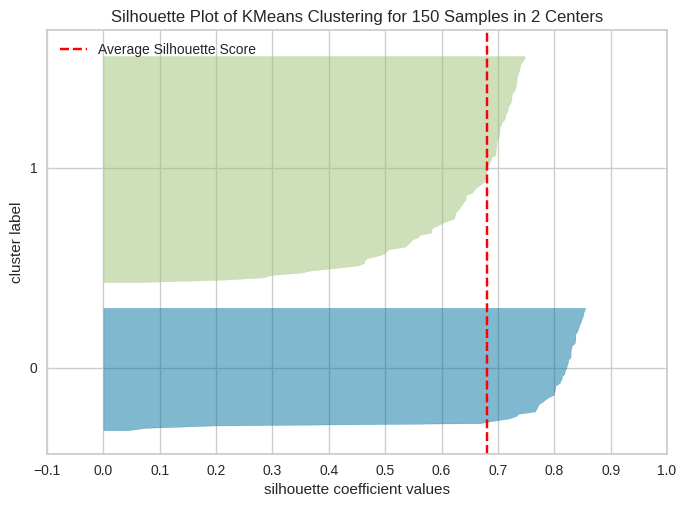

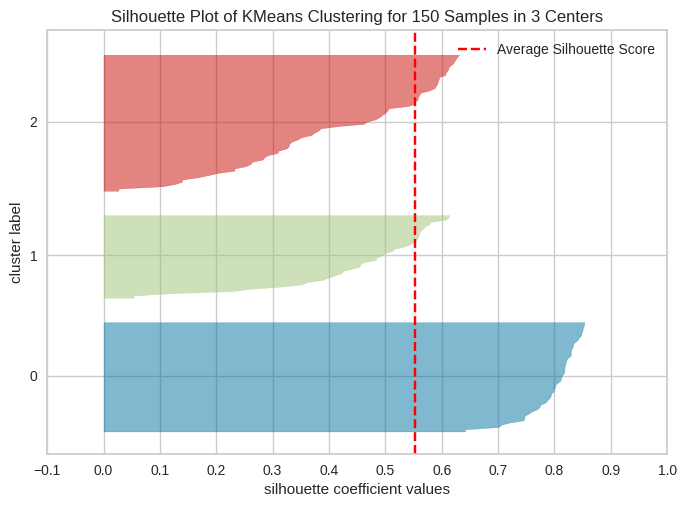

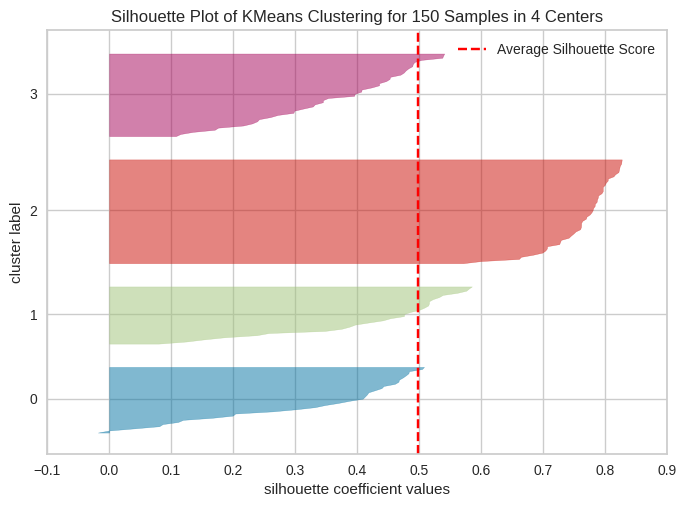

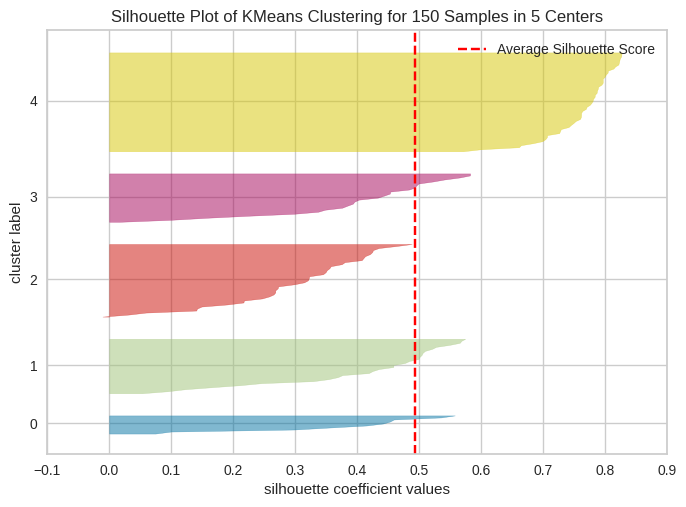

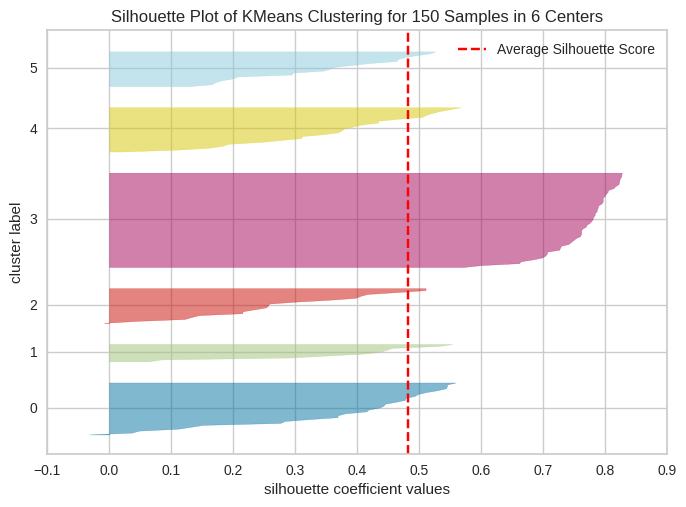

In [ ]:
data = readData("iris.arff")
data = data[:,:-1]

for k in range(2,7):
  clf = KMeans(n_clusters=k, n_init=10, init="random")
  visuals = SilhouetteVisualizer(clf, colors="yellowbrick")
  visuals.fit(data)
  visuals.show()

***Discussion***:
- The average silhoutette score does not change much once we get past two clusters. I would have expected it to vary more with differing numbers of clusters, but it stayed around 0.5 after dropping there from the 0.7 of k=2.
- I think that 3 clusters is the best. This is in part because it does have a slightly higher silhouette score than the other k values after it (0.55 compared to ~0.49).
- This is in part because I know there are three types of flowers that we are predicting on in the Iris data set.
- This is also largely because it gives the most balanced groups. For the clusters where k != 3, there tends to be one group that has a ton of samples in it, while the rest have relatively few samples. This could just be due to the actual distribution of samples in the groups, but I think it is more likely due to the fact that this is the optimal number of clusters.

## 3 (20%) Iris Clustering with HAC

- Use the same dataset as above and learn with HAC clustering
- Create one table with silhouette scores for k=2-6 for each of the linkage options single, average, complete, and ward

In [18]:
data = readData("iris.arff")
data = data[:,:-1]

output = ""
for k in range(2,7):
  for link in ["single", "average", "complete", "ward"]:
    clf = AgglomerativeClustering(n_clusters=k, linkage=link)
    clf.fit(data)
    output = output + f"| {k} | {link} | {round(silhouette_score(data, clf.labels_), 3)} |\n"
print(output)

| 2 | single | 0.686 |
| 2 | average | 0.686 |
| 2 | complete | 0.516 |
| 2 | ward | 0.686 |
| 3 | single | 0.512 |
| 3 | average | 0.554 |
| 3 | complete | 0.513 |
| 3 | ward | 0.554 |
| 4 | single | 0.282 |
| 4 | average | 0.472 |
| 4 | complete | 0.5 |
| 4 | ward | 0.489 |
| 5 | single | 0.283 |
| 5 | average | 0.43 |
| 5 | complete | 0.35 |
| 5 | ward | 0.484 |
| 6 | single | 0.221 |
| 6 | average | 0.341 |
| 6 | complete | 0.342 |
| 6 | ward | 0.362 |



****Discussion***:

| K | Linkage | Silhouette Score |
|:---:|:---:|:---:|
| 2 | single | 0.686 |
| 2 | average | 0.686 |
| 2 | complete | 0.516 |
| 2 | ward | 0.686 |
| 3 | single | 0.512 |
| 3 | average | 0.554 |
| 3 | complete | 0.513 |
| 3 | ward | 0.554 |
| 4 | single | 0.282 |
| 4 | average | 0.472 |
| 4 | complete | 0.5 |
| 4 | ward | 0.489 |
| 5 | single | 0.283 |
| 5 | average | 0.43 |
| 5 | complete | 0.35 |
| 5 | ward | 0.484 |
| 6 | single | 0.221 |
| 6 | average | 0.341 |
| 6 | complete | 0.342 |
| 6 | ward | 0.362|

- It seems like the optimal number of clusters is likely 2 or 3, based on the silhouette scores. These two clusters have significantly higher scores than other numbers of clusters.
- The ward linkage seems to give the best clusters across any number of groups. Within the same k-value, the ward linkage tends to have the highest or one of the highest silhouette scores compared to the other linkages.
- Single linkage tends to be the worst for a specific number of clusters, giving the lowest silhouette score in pretty much all but the k = 2 grouping. This makes sense since this linkage is prone to outliers, with outliers that lie close to another group but are still considered part of the group they belong to.
- It seems that taking into account more distances between points in a group is the better option to find good clusters.

## 4 (20%) Run both algorithms on a real world data

- Choose any real world data set which you have not used previously
- Use parameters of your choosing
- Try each algorithm a few times with different parameters and output one typical example of labels and silhouette scores for each algorithm
- Show the silhouette graph for at least one reasonable *k* value for K-means

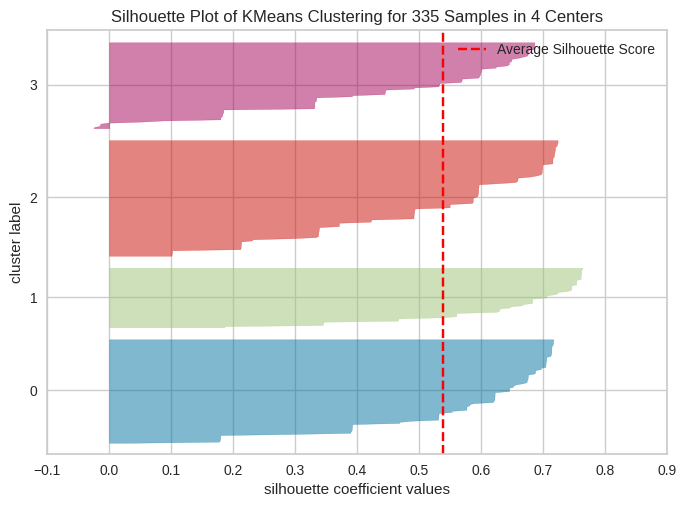

Labels:  [2 2 0 0 2 0 3 3 0 2 3 2 0 3 0 2 0 0 2 2 2 2 0 0 0 2 0 2 0 2 0 2 2 0 0 3 0
 2 0 3 0 3 0 0 2 0 2 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0 2 0 3 0 2 0 2 2 2 2 2 0
 2 0 3 2 2 0 0 2 0 2 0 0 2 0 3 0 2 2 3 0 2 2 3 0 2 0 0 2 2 0 3 2 3 0 2 2 2
 0 2 0 0 0 0 0 2 0 2 0 2 0 2 0 0 0 3 0 2 0 2 0 2 0 0 0 2 0 2 2 0 0 2 2 2 0
 2 2 0 2 2 0 2 2 2 2 2 2 2 0 2 0 2 0 3 0 0 0 2 0 2 0 2 2 3 0 2 0 2 0 2 2 3
 0 3 2 2 0 0 2 3 0 2 0 2 0 2 0 2 0 0 0 2 2 0 2 2 2 2 0 2 2 2 3 1 3 1 1 3 3
 1 3 1 3 1 3 1 2 1 2 1 3 1 1 3 3 3 3 3 1 3 1 1 3 3 1 1 1 3 1 3 1 2 1 2 3 1
 3 2 1 3 1 3 1 3 3 3 3 2 3 3 1 2 1 3 1 3 1 1 3 1 3 3 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 3 3 1 3 1 3 1 1 3 1 3 1 3 1 3 1 3 1 3 1 3 3 1
 1 1]
Silhouette Score:  0.5386237233986169


In [29]:
datapd = pd.read_csv("penguins.csv")
datapd = datapd.dropna()
datapd = pd.get_dummies(datapd, columns=['sex'])
data = datapd.to_numpy()

clf = KMeans(n_clusters=4, init='random', n_init=11)
visuals = SilhouetteVisualizer(clf, colors='yellowbrick')
visuals.fit(data)
visuals.show()
print("Labels: ", visuals.labels_)
print("Silhouette Score: ", silhouette_score(data, visuals.labels_))

***Discussion***:
- This data seems to have 4 different groups of penguins.
- I settled on a model with n_clusters = 4, init = 'random', and n_init = 12
- It was interesting when I changed the number of n_init. Sometimes, even when I had specified a number of clusters (say 4 or 5), the graph would show less (3 or 4). I assume this was because one of the cetners got stuck on some outlier that couldn't be part of another group and so left the algorithm with less main clusters.
- There seems to be a good distribution of samples in each of the clusters when k = 4, which is indicative to me that that clustering is good.
- The silhouette score is not amazing (hovering around 0.54), but it is not terrible either.